<a href="https://colab.research.google.com/github/LiuChen-5749342/Generative-AI-and-AI-Applications/blob/main/Lecture_Notebook%5Ctopic_modeling_illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling Illustration
Topic modeling is a technique used in natural language processing to discover latent topics in a collection of documents.
Topic modeling a variety of applications, such as text classification, information retrieval, predictive modeling and sentiment analysis. For example, in text classification, it can be used to classify documents into different topics based on the distribution of words in the documents. In information retrieval, it can be used to identify relevant documents based on the topics that are most relevant to the user’s query.


# LDA
## Create a random collection of documents and terms
We start by creating a vocabulary of terms and a random collection of documents. In this example, we use a vocabulary of 15 terms and generate 4 documents, each with 6 random terms.


In [ ]:
#!pip install numpy==1.24.3

In [ ]:
!pip install gensim --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 31.8 MB/s eta 0:00:00


**Run Runtime-Restart session after installing gensim**

In [ ]:
import gensim

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models

In [ ]:
np.random.seed(100)  # for reproducibility

# Define the vocabulary
vocabulary = ["ran", "cat", "sat", "on", "mat", "sofa", "licked", "paw", "dog", "chased", "ball", "barked", "loudly", "sun","moon"]

# Define the number of documents, words per document, and number of topics
num_docs = 4
num_words = 6
k = 4

# Simulate words in each document
documents = [np.random.choice(vocabulary, num_words, replace=True) for _ in range(num_docs)]

for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")

Document 1: ['dog' 'dog' 'on' 'paw' 'paw' 'ran']
Document 2: ['ball' 'moon' 'mat' 'sat' 'sofa' 'sat']
Document 3: ['sat' 'moon' 'sat' 'cat' 'ran' 'dog']
Document 4: ['mat' 'barked' 'loudly' 'ball' 'ran' 'barked']


##Display documents and terms
Next, we display the documents and terms.


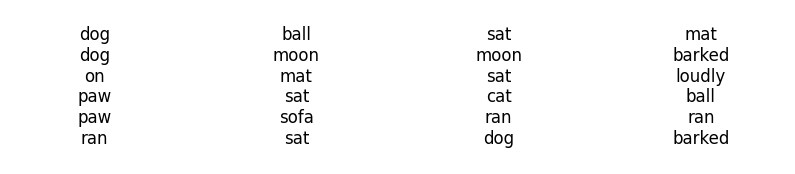

In [ ]:
fig, axes = plt.subplots(1, num_docs, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.axis('off')
    ax.text(0.5, 0.5, '\n'.join(documents[i]), fontsize=12, ha='center', va='center')

plt.show()


##Assign terms to topics
How do we assign terms to topics? Let’s start with a random assignment. We randomly assign each term to a topic and create a dataframe to represent the topic assignments.


In [ ]:
# Randomly assign each word to a topic
word_topics = np.random.randint(0, k, len(vocabulary))
topic_colors = ["red", "blue", "green", "pink"]

# Create a DataFrame to represent topic assignments
df_word_topic = pd.DataFrame({
    'vocabulary': vocabulary,
    'word_topics': word_topics,
    'Color': [topic_colors[i] for i in word_topics]
})

print(df_word_topic)


   vocabulary  word_topics  Color
0         ran            1   blue
1         cat            1   blue
2         sat            2  green
3          on            2  green
4         mat            3   pink
5        sofa            0    red
6      licked            0    red
7         paw            3   pink
8         dog            1   blue
9      chased            1   blue
10       ball            1   blue
11     barked            3   pink
12     loudly            0    red
13        sun            0    red
14       moon            3   pink


##Plot the documents and terms by topic
We plot the documents and terms, coloring each term by its assigned topic.
We compute the number of different topics represented in each document, and the product of the number of topics across all documents.


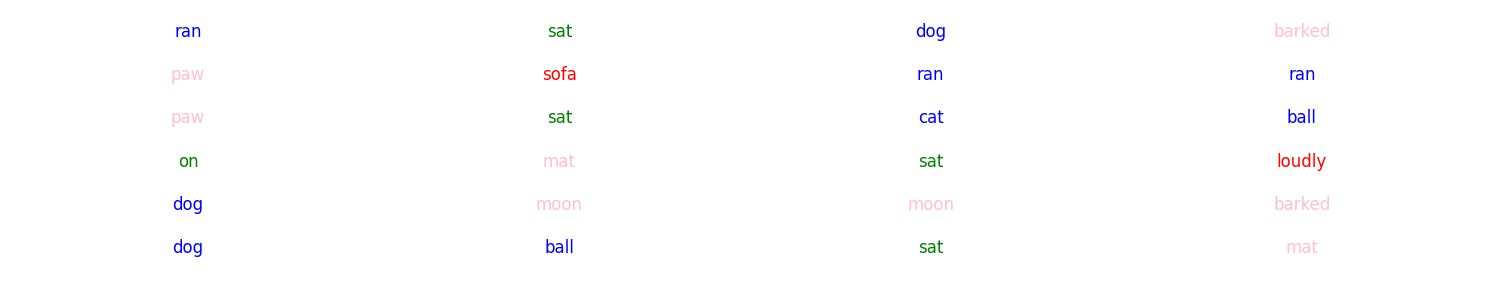

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the topics
topic_colors = ["red", "blue", "green", "pink"]

# Create the figure and axes based on the number of documents
fig, axes = plt.subplots(1, num_docs, figsize=(15, 3))

# Plot each document
for i, ax in enumerate(axes):
    ax.axis('off')  # Turn off axis
    doc_words = documents[i]
    word_labels = []
    word_color = []

    # Retrieve colors and vocabulary for the document
    for word in doc_words:
        idx = vocabulary.index(word)
        word_labels.append(word)
        word_color.append(topic_colors[word_topics[idx]])

    # Define the y positions to space words evenly in the plot
    y_positions = np.linspace(0.1, 0.9, num_words)

    # Plot each word with its corresponding color
    for label, color, y_pos in zip(word_labels, word_color, y_positions):
        ax.text(0.5, y_pos, label, color=color, ha='center', fontsize=12, family='sans')

plt.tight_layout()
plt.show()


##Compute the number of topics represented in each document
We compute the number of different topics represented in each document, and the product of the number of topics across all documents.

In [ ]:
# Initialize the product of distinct topics across documents
prod = 1

for i, doc in enumerate(documents):
    topics_in_doc = np.unique([word_topics[vocabulary.index(word)] for word in doc])
    num_topics = len(topics_in_doc)
    print(f"Document {i+1} has {num_topics} different topics.")
    prod *= num_topics

print(f"The product of the numbers of different topics represented in each of the documents is {prod}.")


Document 1 has 3 different topics.
Document 2 has 4 different topics.
Document 3 has 3 different topics.
Document 4 has 3 different topics.
The product of the numbers of different topics represented in each of the documents is 108.


##Random Reassignment of a Word
In the previous section, we randomly assigned words to topics and computed the product of the number of distinct topics represented in each document. However, this random assignment is unlikely to be optimal. Ideally, we would like to have as few topics in each document as possible. We can improve the assignment by randomly picking a word and reassigning it to a different topic. We repeat this process multiple times and keep the word-topic assignment that has the lowest product of the number of distinct topics represented in each document.

First, we will define a function in Python to randomly reassign a word to a different topic within a document.


In [ ]:
import numpy as np

def topicassign(documents, word_topics, vocabulary, k):
    # Choose a random word from the entire vocabulary
    word_index = np.random.randint(len(vocabulary))
    word = vocabulary[word_index]
    old_topic = word_topics[word_index]

    # Choose a new topic different from the current one
    possible_topics = list(set(range(k)) - {old_topic})
    new_topic = np.random.choice(possible_topics)

    # Update the topic of the chosen word
    word_topics[word_index] = new_topic
    return word_topics

def calculate_product(documents, word_topics, vocabulary):
    # Calculate the product of distinct topics in each document
    product = 1
    for doc in documents:
        topics_in_doc = set(word_topics[vocabulary.index(word)] for word in doc)
        product *= len(topics_in_doc)
    return product

###Find the Optimal Word-Topic Assignment
We will loop through the topicassign function multiple times, trying to minimize the product of the number of distinct topics represented in each document.

In [ ]:
np.random.seed(100)  # For reproducibility

# Simulate initial topics
word_topics = np.random.randint(0, k, len(vocabulary))

# Calculate the initial product of distinct topics
initial_product = calculate_product(documents, word_topics, vocabulary)
print("Initial product of distinct topics:", initial_product)

best_product = initial_product
best_assignment = word_topics.copy()

# Iterative process to optimize topic assignment
for _ in range(1000):
    new_word_topics = topicassign(documents, word_topics.copy(), vocabulary, k)
    new_product = calculate_product(documents, new_word_topics, vocabulary)
    if new_product < best_product:
        best_product = new_product
        best_assignment = new_word_topics.copy()

# Print the optimized product and assignment
print("Optimized product of distinct topics:", best_product)
print("Optimized assignment:", best_assignment)


Initial product of distinct topics: 72
Optimized product of distinct topics: 36
Optimized assignment: [2 0 3 3 3 3 0 2 2 0 2 1 2 2 2]


###Display the optimized word-topic assignment
We display the optimized word-topic assignment and plot the documents and terms by topic.


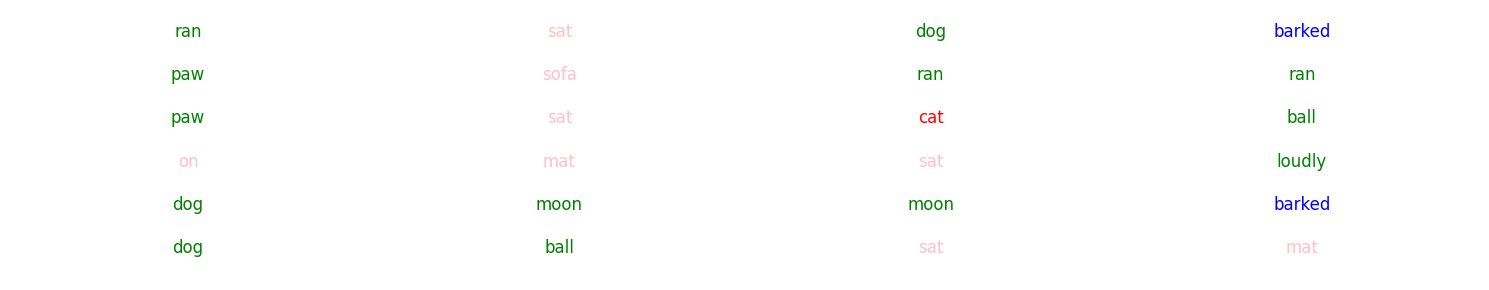

In [ ]:
fig, axes = plt.subplots(1, num_docs, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.axis('off')
    doc_words = documents[i]
    word_labels = []
    word_color = []

    for word in doc_words:
        idx = vocabulary.index(word)
        word_labels.append(word)
        word_color.append(topic_colors[best_assignment[idx]])

    y_positions = np.linspace(0.1, 0.9, num_words)

    for label, color, y_pos in zip(word_labels, word_color, y_positions):
        ax.text(0.5, y_pos, label, color=color, ha='center', fontsize=12, family='sans')

plt.tight_layout()
plt.show()


# Latent Semantic Analysis
To illustrate the Latent Semantic Analysis (LSA) method using Singular Value Decomposition (SVD) from first principles, we will follow these steps:

Create a Term-Document Matrix: This matrix represents the frequency of each term in each document.

Apply SVD: Decompose the term-document matrix to identify patterns in the relationships between the terms and documents.

Interpret the Results: Explain how the decomposition reflects latent topics within the data.

##Create a Term-Document Matrix
First, we construct a term-document matrix where each row represents a term from our vocabulary, and each column represents a document. The values in this matrix are the frequencies of the terms in the documents.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(100)  # for reproducibility

# Define the vocabulary
vocabulary = ["ran", "cat", "sat", "on", "mat", "sofa", "licked", "paw", "dog", "chased", "ball", "barked", "loudly", "sun","moon"]

# Define the number of documents, words per document, and number of topics
num_docs = 4
num_words = 6
k = 4

# Simulate words in each document
documents = [np.random.choice(vocabulary, num_words, replace=True) for _ in range(num_docs)]

# Vocabulary extracted from the documents
vocabulary = sorted({word for doc in documents for word in doc})

# Create the term-document matrix
def create_term_document_matrix(documents, vocabulary):
    # Initialize the matrix with zeros
    tdm = np.zeros((len(vocabulary), len(documents)), dtype=int)

    # Fill the matrix with term frequencies
    for j, doc in enumerate(documents):
        for term in doc:
            i = vocabulary.index(term)
            tdm[i, j] += 1

    return tdm

term_document_matrix = create_term_document_matrix(documents, vocabulary)
print("Term-Document Matrix:\n", pd.DataFrame(term_document_matrix, index=vocabulary, columns=[f"Doc {i+1}" for i in range(len(documents))]))


Term-Document Matrix:
         Doc 1  Doc 2  Doc 3  Doc 4
ball        0      1      0      1
barked      0      0      0      2
cat         0      0      1      0
dog         2      0      1      0
loudly      0      0      0      1
mat         0      1      0      1
moon        0      1      1      0
on          1      0      0      0
paw         2      0      0      0
ran         1      0      1      1
sat         0      2      2      0
sofa        0      1      0      0


##Singular Value Decomposition (SVD)
We will use SVD to decompose the term-document matrix into three matrices
$$
A = U \Sigma V^T
$$

$U$ (left singular vectors) represents the term-topic relationships.

$ \Sigma$ (singular values) represents the strength of each topic.

$V^T$ (right singular vectors) represents the document-topic relationships.


### Simple Example

\
A = \begin{bmatrix}
52 & 93 & 15 & 72 \\
61 & 21 & 83 & 87 \\
75 & 75 & 88 & 24 \\
\end{bmatrix}

where
$$
A = U \Sigma V^T
$$


\
U = \begin{bmatrix}
0.534 & 0.798 & -0.279 \\
0.583 & -0.587 & -0.562 \\
0.612 & -0.137 & 0.779 \\
\end{bmatrix} \

$Σ$ = \begin{bmatrix}
215.673 & 0 & 0 & 0 \\
0 & 71.245 & 0 & 0 \\
0 & 0 & 57.976 & 0 \\
\end{bmatrix} \

$V^T$ = \begin{bmatrix}
0.507 & 0.500 & 0.511 & 0.482 \\
-0.065 & 0.724 & -0.685 & 0.044 \\
0.166 & 0.356 & 0.305 & -0.868 \\
\end{bmatrix} \

In [ ]:
from numpy.linalg import svd

# Apply SVD
U, sigma, VT = svd(term_document_matrix, full_matrices=False)

# Convert sigma to a diagonal matrix
Sigma = np.diag(sigma)

print("U (Term-Topic Matrix):\n", pd.DataFrame(U, index=vocabulary))
print("\nSigma (Strength of Topics):\n", Sigma)
print("\nV^T (Document-Topic Matrix):\n", pd.DataFrame(VT, columns=[f"Doc {i+1}" for i in range(len(documents))]))


U (Term-Topic Matrix):
                0         1         2         3
ball   -0.222700  0.214897 -0.280626 -0.329935
barked -0.162324  0.104678 -0.682114  0.208737
cat    -0.163901  0.027950  0.128172  0.458382
dog    -0.395976 -0.520785  0.095773  0.076957
loudly -0.081162  0.052339 -0.341057  0.104369
mat    -0.222700  0.214897 -0.280626 -0.329935
moon   -0.305438  0.190508  0.188603  0.024078
on     -0.116038 -0.274367 -0.016200 -0.190712
paw    -0.232075 -0.548735 -0.032399 -0.381424
ran    -0.361101 -0.194079 -0.229085  0.372038
sat    -0.610876  0.381015  0.377205  0.048157
sofa   -0.141537  0.162558  0.060431 -0.434303

Sigma (Strength of Topics):
 [[3.86482701 0.         0.         0.        ]
 [0.         3.08279553 0.         0.        ]
 [0.         0.         2.7050538  0.        ]
 [0.         0.         0.         1.49738699]]

V^T (Document-Topic Matrix):
       Doc 1     Doc 2     Doc 3     Doc 4
0 -0.448465 -0.547017 -0.633448 -0.313678
1 -0.845818  0.501132  0.086163

##Interpret the Results
The matrices from the SVD give us insights into how the terms and documents relate to the underlying topics:


$U$ matrix: Each row shows a term's association with different topics. The terms that strongly influence a topic will have higher absolute values in the corresponding column.

\$Σ$ matrix: The diagonal values indicate the importance or strength of each topic. A higher value means the topic is more significant in capturing the structure of the data.

\$V^T$  matrix: Each column shows how much a document contributes to or is represented by each topic.

  
These results help illustrate latent topics in the dataset by showing which terms group together under topics and how documents relate to these topics. By reducing the dimensionality (selecting top k singular values and corresponding vectors), we can focus on the most meaningful topics in the data.

## Visualize the results

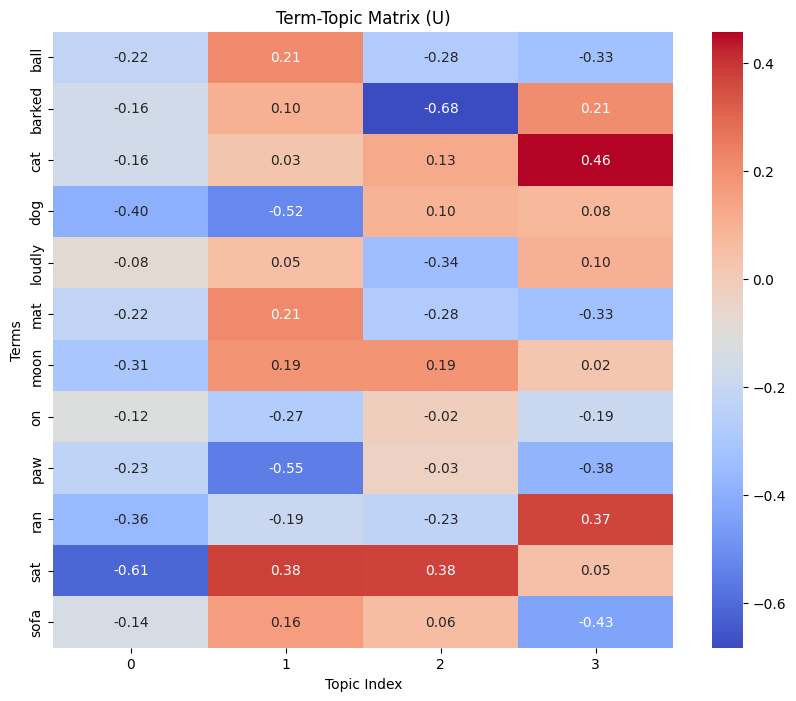

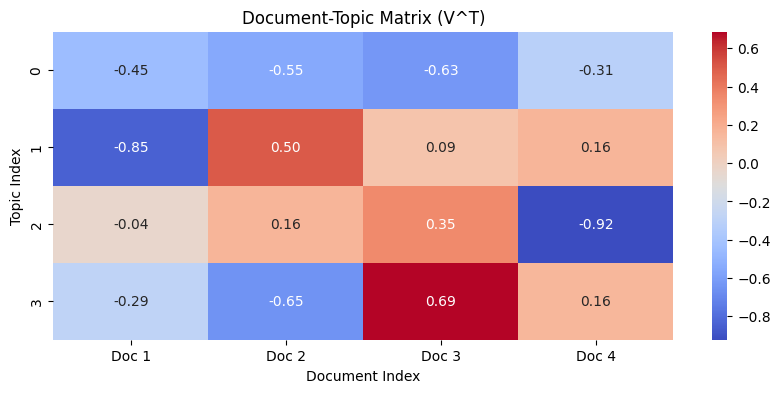

In [ ]:
import seaborn as sns
import pandas as pd

# Term-Topic Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(U, index=vocabulary), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Term-Topic Matrix (U)')
plt.xlabel('Topic Index')
plt.ylabel('Terms')
plt.show()

# Document-Topic Matrix Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pd.DataFrame(VT, columns=[f"Doc {i+1}" for i in range(len(documents))]), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Document-Topic Matrix (V^T)')
plt.xlabel('Document Index')
plt.ylabel('Topic Index')
plt.show()



### Dominant Topic for Each Term Using Absolute Values
* We will identify the dominant topic for each term based on the highest absolute contribution
* Visualize each term with a color corresponding to its dominant topic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'U' is your term-topic matrix from the SVD:
term_topic_matrix = pd.DataFrame(U, index=vocabulary)

# Calculate absolute values to focus only on the strength of contribution
abs_term_topic_matrix = term_topic_matrix.abs()

# Find the index of the topic with the highest absolute contribution for each term
dominant_topic = np.argmax(abs_term_topic_matrix.values, axis=1)

# Create a new DataFrame for visualization
terms_dominant_topic = pd.DataFrame({
    'Term': term_topic_matrix.index,
    'Dominant Topic': dominant_topic,
    'Absolute Contribution': [abs_term_topic_matrix.iloc[i, dominant_topic[i]] for i in range(len(dominant_topic))]
})

# Sort by Dominant Topic
terms_dominant_topic.sort_values(by='Dominant Topic', inplace=True)



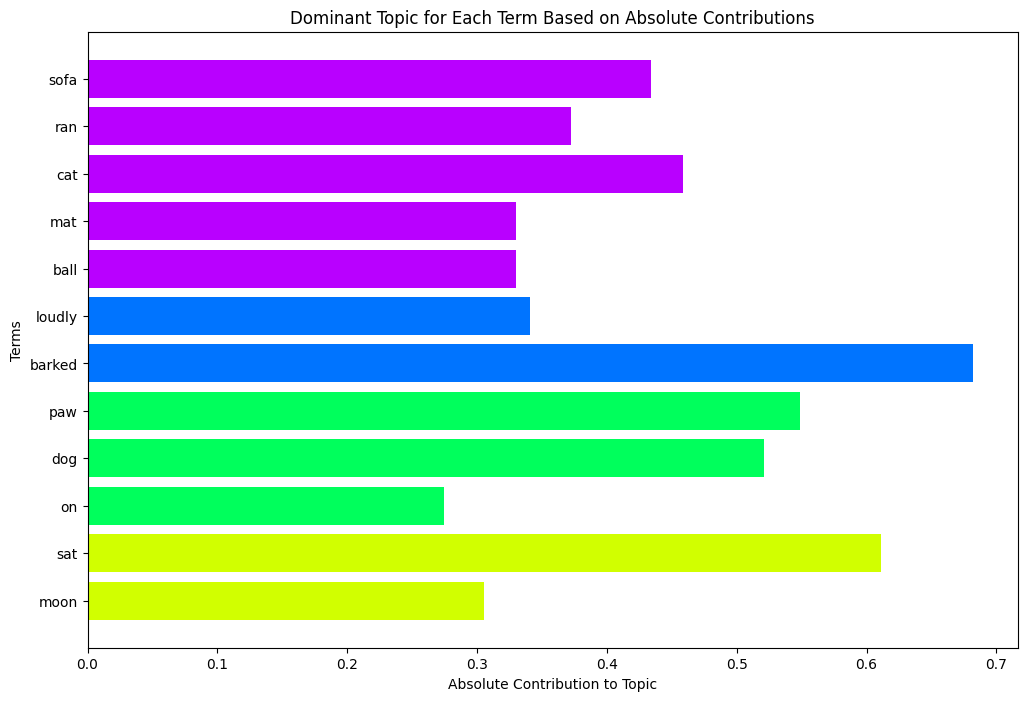

In [ ]:
# Create a color palette with a distinct color for each topic
num_topics = len(sigma)  # Assuming 'sigma' holds singular values from the SVD
topic_colors = sns.color_palette("hsv", num_topics)

# Map colors to topics
terms_dominant_topic['Color'] = terms_dominant_topic['Dominant Topic'].apply(lambda x: topic_colors[x])

# Plot
plt.figure(figsize=(12, 8))
plt.barh(terms_dominant_topic['Term'], terms_dominant_topic['Absolute Contribution'], color=terms_dominant_topic['Color'])
plt.xlabel('Absolute Contribution to Topic')
plt.ylabel('Terms')
plt.title('Dominant Topic for Each Term Based on Absolute Contributions')
plt.show()



# Non-negative Matrix Factorization (NMF)

$V$ is factorized into (usually) two matrices
$W$ and $H$, with the property that all three matrices have no negative elements.

Given a non-negative matrix $V$, NMF finds two non-negative matrices $W$ and $H$ such that

$$V ≈ 𝑊⋅𝐻$$

The matrix
$V$ is usually of size $𝑚×𝑛$, where $𝑚$ is the number of documents and
$n$ is the number of terms. $W$ is of size 𝑚×𝑘, and $H$ is $k×n$, where
𝑘 is the number of latent features or topics.

The matrix $W$ represents the weight of each topic (latent feature) for each document, and $H$ represents the composition of each feature in terms of the latent features. In the context of topic modeling, $V$ is the term-document frequency matrix, $W$ indicates how much of each topic is present in each document, and $H$ shows how much of each word is present in each topic.



In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

# Documents
documents = [
    'paw paw on its its the',
    'chased sun mat sat and sat',
    'sat sun sat cat the paw',
    'mat ball barked chased the ball'
]

# Step 1: Preprocessing
# Create a CountVectorizer, considering the words provided are already preprocessed and stop-words are removed
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Step 2: Applying NMF
# Create and fit the NMF model
# The number of topics (n_components) is assumed to be 2 for demonstration
# This could be determined using model selection techniques or domain knowledge
n_components = 3
nmf_model = NMF(n_components=n_components, random_state=42)
W = nmf_model.fit_transform(X)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix

In [ ]:
W

array([[0.        , 1.07603965, 0.        ],
       [0.45425701, 0.        , 0.13952133],
       [0.41217971, 0.26996476, 0.        ],
       [0.        , 0.00539038, 1.42557684]])

In [ ]:
# To print the H matrix with terms shown in rows, we can create a DataFrame with terms as the index

# Create a DataFrame for H matrix (Topic-Term matrix)
H_df = pd.DataFrame(H,columns=vocabulary)

# Transpose the DataFrame to have terms as rows
H_transposed = H_df.T

# Print the transposed H matrix with terms as rows
print(H_transposed)



               0         1         2
ball    1.202153  0.000000  0.030867
barked  0.000000  0.000083  1.389630
cat     0.000000  0.000042  0.694815
dog     1.058976  0.123604  0.000000
loudly  1.084498  0.000000  0.729316
mat     0.000000  1.748561  0.000000
moon    1.084498  0.000000  0.729316
on      0.000000  0.874281  0.000000
paw     0.527625  1.920205  0.000000
ran     4.598985  0.022898  0.000000
sat     2.299493  0.011449  0.000000
sofa    0.677275  1.032591  0.670027


**Algorithm**: The factorization is achieved through iterative optimization algorithms, such as gradient descent, alternating least squares, or multiplicative update rules. The goal is to minimize the difference between
$V$ and the product $W⋅H$, subject to $W$ and $H$ being non-negative.NMF is not unique, and different initializations can lead to different results.